<div style="width: 38.5%;">
    <p><strong>City College of San Francisco</strong><p>
    <hr>
    <p>MATH 108 - Foundations of Data Science</p>
</div>

# Lecture 15: Sampling

Associated Textbook Sections: [10.0, 10.1, 10.2, 10.3](https://inferentialthinking.com/chapters/10/Sampling_and_Empirical_Distributions.html)

<h2>Set Up the Notebook<h2>

In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lecture-15:-Sampling" data-toc-modified-id="Lecture-15:-Sampling-1">Lecture 15: Sampling</a></span><ul class="toc-item"><li><span><a href="#Set-Up-the-Notebook" data-toc-modified-id="Set-Up-the-Notebook-1.1">Set Up the Notebook</a></span></li><li><span><a href="#" data-toc-modified-id="-1.2"></a></span></li><li><span><a href="#Sampling" data-toc-modified-id="Sampling-1.3">Sampling</a></span><ul class="toc-item"><li><span><a href="#Random-Samples" data-toc-modified-id="Random-Samples-1.3.1">Random Samples</a></span></li><li><span><a href="#Demo:-Random-Sampling" data-toc-modified-id="Demo:-Random-Sampling-1.3.2">Demo: Random Sampling</a></span></li><li><span><a href="#Sample-of-Convenience" data-toc-modified-id="Sample-of-Convenience-1.3.3">Sample of Convenience</a></span></li></ul></li><li><span><a href="#Distrubtions" data-toc-modified-id="Distrubtions-1.4">Distrubtions</a></span><ul class="toc-item"><li><span><a href="#Probability-Distribution" data-toc-modified-id="Probability-Distribution-1.4.1">Probability Distribution</a></span></li><li><span><a href="#Empirical-Distribution" data-toc-modified-id="Empirical-Distribution-1.4.2">Empirical Distribution</a></span></li><li><span><a href="#Demo:-Distributions" data-toc-modified-id="Demo:-Distributions-1.4.3">Demo: Distributions</a></span></li></ul></li><li><span><a href="#Large-Random-Samples" data-toc-modified-id="Large-Random-Samples-1.5">Large Random Samples</a></span><ul class="toc-item"><li><span><a href="#Law-of-Averages-/-Law-of-Large-Numbers" data-toc-modified-id="Law-of-Averages-/-Law-of-Large-Numbers-1.5.1">Law of Averages / Law of Large Numbers</a></span></li><li><span><a href="#Empirical-Distribution-of-a-Sample" data-toc-modified-id="Empirical-Distribution-of-a-Sample-1.5.2">Empirical Distribution of a Sample</a></span></li><li><span><a href="#Demo:-Large-Random-Samples" data-toc-modified-id="Demo:-Large-Random-Samples-1.5.3">Demo: Large Random Samples</a></span></li></ul></li><li><span><a href="#A-Statistic" data-toc-modified-id="A-Statistic-1.6">A Statistic</a></span><ul class="toc-item"><li><span><a href="#Inference" data-toc-modified-id="Inference-1.6.1">Inference</a></span></li><li><span><a href="#Terminology" data-toc-modified-id="Terminology-1.6.2">Terminology</a></span></li><li><span><a href="#Demo:-Simulating-Statistics" data-toc-modified-id="Demo:-Simulating-Statistics-1.6.3">Demo: Simulating Statistics</a></span></li><li><span><a href="#Probability-Distribution-of-a-Statistic" data-toc-modified-id="Probability-Distribution-of-a-Statistic-1.6.4">Probability Distribution of a Statistic</a></span></li><li><span><a href="#Empirical-Distribution-of-a-Statistic" data-toc-modified-id="Empirical-Distribution-of-a-Statistic-1.6.5">Empirical Distribution of a Statistic</a></span></li></ul></li></ul></li></ul></div>

## Sampling

### Random Samples

* Deterministic sample: Sampling scheme doesn't involve chance
* Random sample: 
    * Before the sample is drawn, you have to know the selection probability of every group of people in the population
    * Not all individuals / groups have to have equal chance of being selected


### Demo: Random Sampling

Load the `united.csv` flight data containing information on United flights leaving SFO in 2015.

In [2]:
united = Table.read_table('united.csv')
united = united.with_column('Row', np.arange(united.num_rows)).move_to_start('Row')
united

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


Demonstrate how to use the `take` method to systematically sample the data.

In [3]:
united.take(np.arange(0, united.num_rows, 1000))

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1000,6/7/15,1692,EWR,7
2000,6/14/15,824,JFK,-1
3000,6/21/15,217,EWR,5
4000,6/27/15,1401,SAN,-4
5000,7/4/15,1614,LAS,-2
6000,7/11/15,401,CLE,4
7000,7/17/15,1645,IAD,0
8000,7/24/15,624,ORD,61
9000,7/30/15,1728,ORD,209


Use `np.random.choice` introduce an element of chance into the sampling process.

In [4]:
start = np.random.choice(np.arange(1000))
systematic_sample = united.take(np.arange(start, united.num_rows, 1000))
systematic_sample.show()

Row,Date,Flight Number,Destination,Delay
238,6/2/15,1204,SEA,11
1238,6/9/15,736,EWR,-7
2238,6/15/15,1947,PHL,100
3238,6/22/15,1497,SEA,44
4238,6/29/15,572,ORD,-5
5238,7/6/15,1091,DEN,-1
6238,7/12/15,1950,CLE,-2
7238,7/19/15,1073,BOS,14
8238,7/25/15,1930,IAD,-2
9238,8/1/15,743,BOS,-1


### Sample of Convenience

* Example: sample consists of whoever walks by
* Just because you think you're sampling "randomly", doesn't mean you have a random sample.
* If you can't figure out the following ahead of time, then you don't have a random sample
    * what's the population
    * what's the chance of selection, for each group in the population

## Distrubtions

### Probability Distribution

* Random quantity with various possible values
* Probability Distribution:
    * All the possible values of the quantity
    * The probability of each of those values
* If you can do the math, you can work out the probability distribution without ever simulating it
* But... simulation is often easier!


### Empirical Distribution

* Empirical: based on observations
* Observations can be from repetitions of an experiment
* Empirical Distribution:
    * All observed values
    * The proportion of times each value appears

### Demo: Distributions

Create a table with the face numbers of a six-sided die. Use that table with the `sample` method to simulate randomly rolling a die. Visualize the empirical distribution.

In [5]:
die = Table().with_column('Face', np.arange(1, 7))
die

Face
1
2
3
4
5
6


In [6]:
die.sample(10)

Face
5
1
3
5
2
1
3
2
6
2


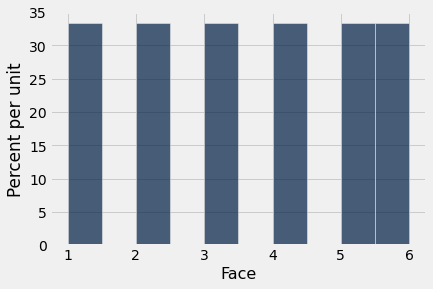

In [7]:
die.hist()

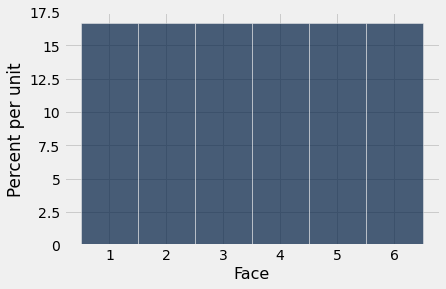

In [8]:
roll_bins = np.arange(0.5, 6.6, 1)
die.hist(bins=roll_bins)

Update the bins and randomly sample for a few different sample sizes.

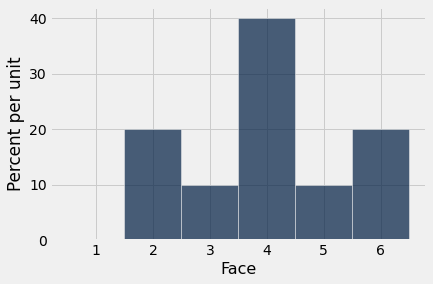

In [9]:
die.sample(10).hist(bins=roll_bins)

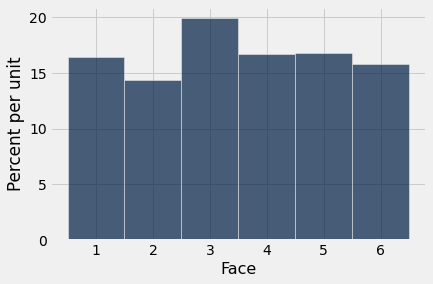

In [10]:
die.sample(1000).hist(bins=roll_bins)

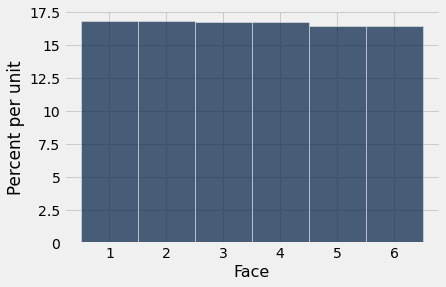

In [11]:
die.sample(100000).hist(bins=roll_bins)

## Large Random Samples

### Law of Averages / Law of Large Numbers

* If a chance experiment is repeated many times, independently and under the same conditions, then the proportion of times that an event occurs gets closer to the theoretical probability of the event
* As you increase the number of rolls of a six-sided die, the proportion of times you see the face with five spots gets closer to 1/6


### Empirical Distribution of a Sample

If the sample size is large, then the empirical distribution of a uniform random sample resembles the distribution of the population, with high probability.


### Demo: Large Random Samples

Visualize the distribution of flight delays in the `united` data.

In [19]:
united

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


Perform several calculations on the delay values such as min, max, average, etc.

In [21]:
np.min(united.column("Delay"))

-16

In [22]:
max(united.column("Delay"))

580

In [23]:
np.mean(united.column("Delay"))

16.658155515370705

In [25]:
united.sort("Delay", descending=True)

Row,Date,Flight Number,Destination,Delay
3140,6/21/15,1964,SEA,580
3154,6/22/15,300,HNL,537
3069,6/21/15,1149,IAD,508
2888,6/20/15,353,ORD,505
12627,8/23/15,1589,ORD,458
7949,7/23/15,1960,LAX,438
3412,6/23/15,1606,ORD,430
578,6/4/15,1743,LAX,408
2474,6/17/15,1122,HNL,405
8426,7/27/15,572,ORD,385


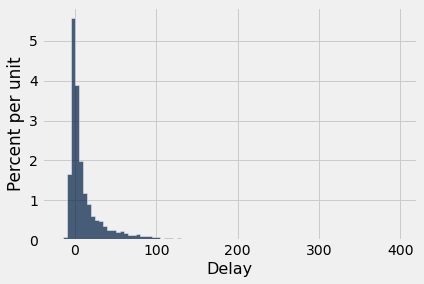

In [26]:
united_bins = np.arange(-20, 401, 5)
united.hist('Delay', bins = united_bins)

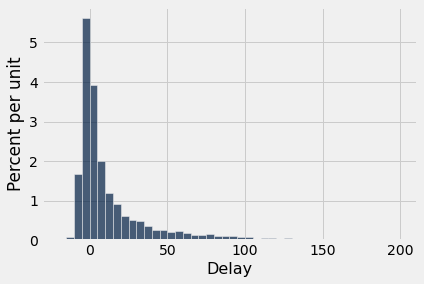

In [28]:
united_bins = np.arange(-20, 201, 5)
united.hist('Delay', bins = united_bins)

Randomly sample 10 and 1000 flights from the United data and visualize the distributions of the samples.

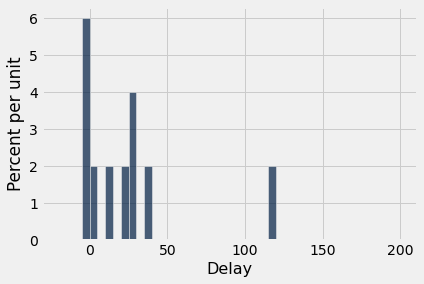

In [32]:
united.sample(10).hist('Delay', bins = united_bins)

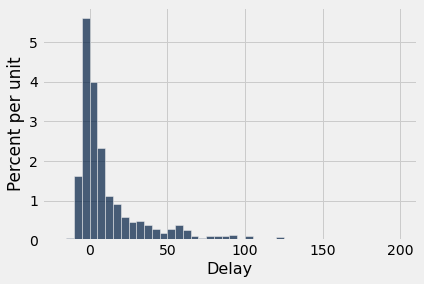

In [33]:
united.sample(1000).hist('Delay', bins = united_bins)

## A Statistic

### Inference

* Statistical Inference: Making conclusions based on data in random samples
* Example: Use the data to guess the value of an unknown and fixed number by creating an estimate of the unknown quantity that depends on the random sample.



### Terminology

* Parameter: A number associated with the population
* Statistic: A number calculated from the sample
* A statistic can be used as an estimate of a parameter

### Demo: Simulating Statistics

Calculate the median parameter for the United flight delays and compare it to the median statistic associated with a random sample of 10 flights.

In [34]:
np.median(united.column('Delay'))

2.0

In [39]:
np.median(united.sample(10).column('Delay'))

7.0

Define a function that randomly samples United flight data for an inputed sample size and returns the median Delay for that sample.

In [43]:
def sample_median(size):
    return np.median(united.sample(size).column('Delay'))
sample_median(10)

3.0

Simulate randomly sampling 10 flights 1000 times and storing the sample delay medians for each iteration. Add the results to a table and visualize the sampling distribution.

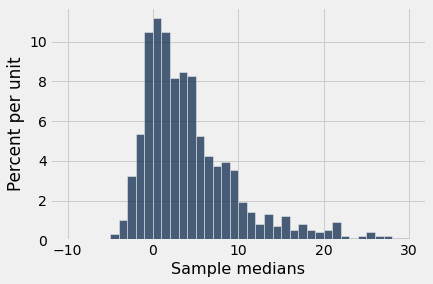

In [44]:
sample_medians = make_array()

for i in np.arange(1000):
    new_median = sample_median(10)
    sample_medians = np.append(sample_medians, new_median)

Table().with_column('Sample medians', sample_medians).hist(bins = np.arange(-10,31))

Repeat the sample simulation except use a sample size of 1000, instead of 10.

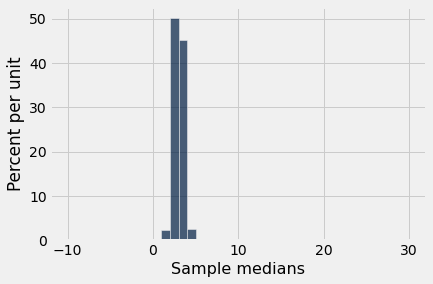

In [45]:
sample_medians = make_array()

for i in np.arange(1000):
    new_median = sample_median(1000)
    sample_medians = np.append(sample_medians, new_median)

Table().with_column('Sample medians', sample_medians).hist(bins = np.arange(-10,31))

### Probability Distribution of a Statistic

* Values of a statistic vary because random samples vary
* Sampling distribution (or probability distribution) of the statistic:
    * All possible values of the statistic,
    * and all the corresponding probabilities
    * Can be hard to calculate
        * Either have to do the math
        * Or have to generate all possible samples and calculate the statistic based on each sample


### Empirical Distribution of a Statistic

* Empirical distribution of the statistic:
    * Based on simulated values of the statistic
    * Consists of all the observed values of the statistic,
    * and the proportion of times each value appeared
* Good approximation to the probability distribution of the statistic if the number of repetitions in the simulation is large


<footer>
    <hr>
    <p>Adopted from UC Berkeley DATA 8 course materials.</p>
    <p>This content is offered under a <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/">CC Attribution Non-Commercial Share Alike</a> license.</p>
</footer>